# K-MEANS ALGORITHM

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0.

## Part 1

In [1]:
import lab_1_common as cm
import numpy as np
import random as rm
import matplotlib.pyplot as plt

1.1) Complete the following distance function

In [2]:
# Returns the Euclidean distance between two vectors
# @param A - vector of numbers 
# @param B - vector of numbers
# @return number - Euclidean Distance between A & B
def getEuclideanDistance(A, B):
    a=np.array(A)
    b=np.array(B)
    c=np.linalg.norm(b-a)
    return c

print(getEuclideanDistance([0.0, 0.0, 2.0, 1.0, 3.0, 7.0], [0.0, 1.0 ,1.0,1.0,1.0,1.0]))
print(getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

6.48074069840786
1.4142135623730951


1.2) Get test data set & display (data = matrix n x m, n = the number of objects, m = the number of attributes)

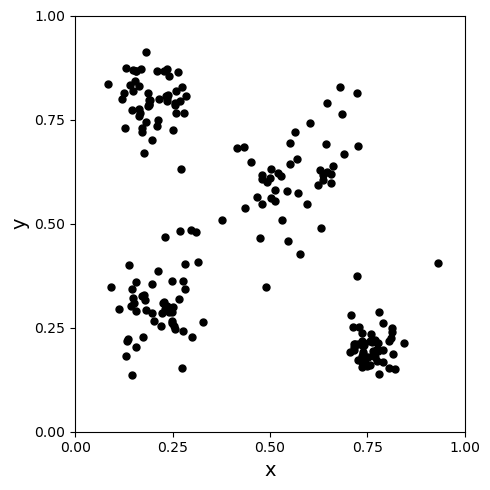

In [3]:
dataBlackDots = cm.getTestDataSet()
cm.displayDataSet(plt, dataBlackDots)

How many different clusters (groups) do you see here?

The data for this exercise was generated artificially. You can run the below code to see the "true" group assignment.

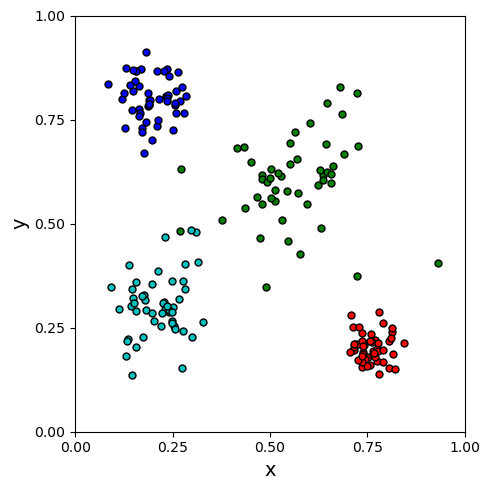

In [4]:
dataColorDots = cm.getTestDataSet()
assignmentsColorDots = cm.getTestAssignments()
cm.displayDataSet(plt, dataColorDots, assignments = assignmentsColorDots)

1.3) K-Means implementation: Firstly, we need to construct K "centroids". Each centroid represents one group. For simplicity, initially assume that the centroids are randomly selected from the data set (i.e., clone/copy some K random points from data set). Check numpy.random package. Important: each centroid should be unique (no repetitions, consider a "shuffle" approach). Finish the bolow code.

In [5]:
# Returns K random centroids from DATA set
# @param K - the number of clusters ( 1 centroid for 1 cluster )
# @param DATA - data set
# @return an array of centroids
def getCentroids(K, DATA):
    rm.shuffle(DATA)
    return DATA[:K]

1.4) Get acquainted with some parameters: 
- DATA - test data set, a vector of  n 2d points: [[x1, y1], ..., [xn, yn]], loaded from common.py
- M - the number of attributes/dimensions; M = 2 for this exercise,
- K - expected number of groups,
- CENTROIDS - initial K centroids; CENTROIDS =  [[x1, y1],...,[xk, yk]],
- ASSIGNMENTS - data structure representing group assignments; ASSIGNMENTS = [[idx1_1,...,],....,[idx1_K,....]], i.e., i-th element is a vector of indexes of corresponding data points in DATA, being assigned to i-th group. For instance if |DATA| = 3, K = 2, and ASSIGNMENTS = [[0, 2], [1]], it means that DATA[0] and DATA[2] points are assigned to the first group, while DATA[1] point is assigned to the second group.

1.5) Finish the below function. It should perform a single step of K-Means algorithm:

a) Firstly, construct new group assignments. For this reason, iterate over all data points. For each (i-th) point, verify its distance to each (k-th) centroid. Check for which centroid the distance is the smallest and update NEW_ASSIGNMENTS adequately (NEW_ASSIGNMENTS[k-th centroid].append(i-th index/data point)).

Important: NO_CHANGE boolean variable should be set to False if the assignments have changed from the previous iteration to the current one (NEW_ASSIGNMENTS != (OLD) ASSIGNMENTS). 

b) Update centroids (NEW_CENTROIDS), i.e., compute centers of masses of data points belonging to different groups. 

c) Return NO_CHANGE, NEW_ASSIGNMENTS, NEW_CENTROIDS.

In [6]:
# Returns Centroids and Assignments after single K-Means step and changeFlag that indicates the need to repeat the process
# @param DATA - data set
# @param M - number of dimensions of an element from data set
# @param K - the number of clusters
# @param CENTROIDS - set of precalculated centroids
# @param ASSIGNMENTS - data structure representing group assignments
# @return noChangeFlag, newCentroids, newAssignments
def doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS):
    changeFlag = False
    newCentroids = []
    newAssignments = [[] for i in range(K)]
    for index in range(len(DATA)):
        clusterIndex = 0
        minDistance = float('inf')
        for currentClusterIndex in range(K):
            distance = getEuclideanDistance(DATA[index],CENTROIDS[currentClusterIndex])
            if distance < minDistance:
                minDistance = distance
                clusterIndex = currentClusterIndex
        newAssignments[clusterIndex].append(index)
    if newAssignments == ASSIGNMENTS: changeFlag = True
    for currentClusterIndex in range(K):
        clusterCentroid = [0 for i in range(M)]
        for dimension in range(M):
            average = 0
            buffer = [DATA[newAssignments[currentClusterIndex][assignment]][dimension] for assignment in range(len(newAssignments[currentClusterIndex]))]
            average = sum(buffer)
            if(len(newAssignments[currentClusterIndex]) == 0):
                average = 0
            else:
                average /= len(newAssignments[currentClusterIndex])
            clusterCentroid[dimension] = average
        newCentroids.append(clusterCentroid)
    return changeFlag, newCentroids, newAssignments

1.6) The below code performs 1 iteration of K-Menas algorithm for K=2 and the test data set. Check the results (notice that centroids are marked with squares).

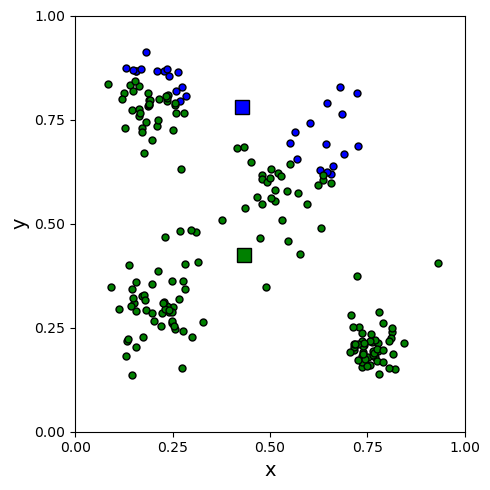

In [7]:
dataOneStepTest = cm.getTestDataSet()
mOneStepTest = 2
kOneStepTest = 2
centroidsOneStepTest = getCentroids(kOneStepTest, dataOneStepTest)
changeFlagOneStepTest, newCentroidsOneStepTest, newAssignmentsOneStepTest = doKMeansStep(dataOneStepTest, mOneStepTest, kOneStepTest, centroidsOneStepTest, [])
cm.displayDataSet(plt, dataOneStepTest, assignments=newAssignmentsOneStepTest, centroids=newCentroidsOneStepTest)

1.7) Complete the below piece of code. The doKMeans function should perform 100 steps of K-Means algorithm. However, the loop should be stopped when the NO_CHANGE variable = True. It that is so, print the information on after how many iterations the process has stopped. Lastly, use cm.displayDataSet to depict the final groups (if display = True). 

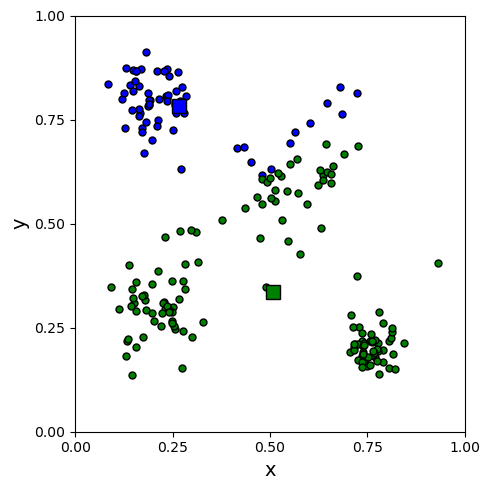

In [8]:
# Returns data set divided into K clusters
# @param DATA - data set to divide
# @param CENTROIDS - set of precalculated centroids
# @param M - number of dimensions of an element from data set
# @param K - the number of clusters
# @param display - 
# @return noChangeFlag, newCentroids, newAssignments
def doKMeans(DATA, CENTROIDS, M, K, display = True):
    newAssignments = [[] for i in range(K)]
    changeFlag,newCentroids,newAssignments=doKMeansStep(DATA,M,K,CENTROIDS,newAssignments)
    for i in range(1000):
        if not changeFlag:
            changeFlag,newCentroids,newAssignments=doKMeansStep(DATA, M, K, newCentroids, newAssignments)
        else:
            break
    if display: cm.displayDataSet(plt, DATA, assignments=newAssignments, centroids=newCentroids)
    return DATA, newCentroids, newAssignments

dataKStepsTest = cm.getTestDataSet()
mKStepsTest = 2
kKStepsTest = 2
centroidsKStepsTest = getCentroids(kKStepsTest, dataKStepsTest)
dataKStepsTest, newCentroidsKStepsTest, newAssignmentsKStepsTest = doKMeans(dataKStepsTest, centroidsKStepsTest, mKStepsTest, kKStepsTest)

1.8) Perform the below piece of code and observe the results. Which K is seems to be the best choice?

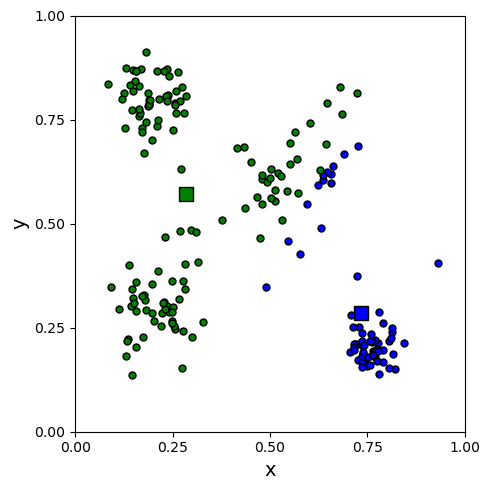

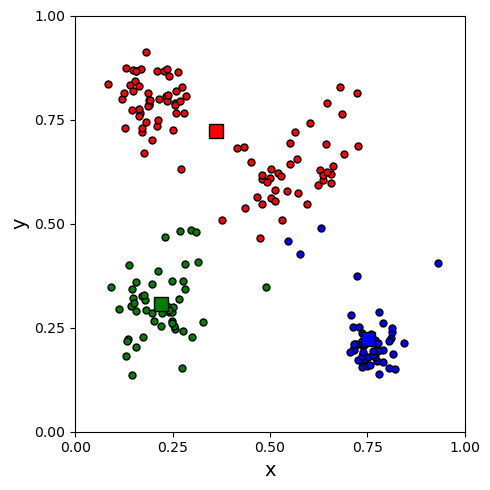

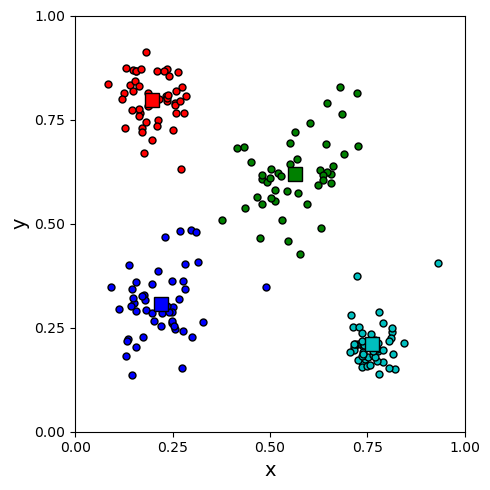

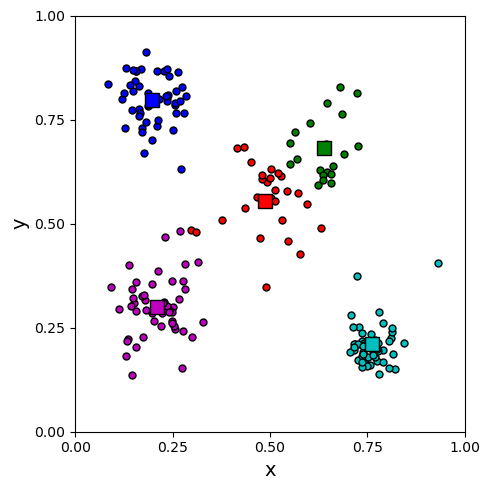

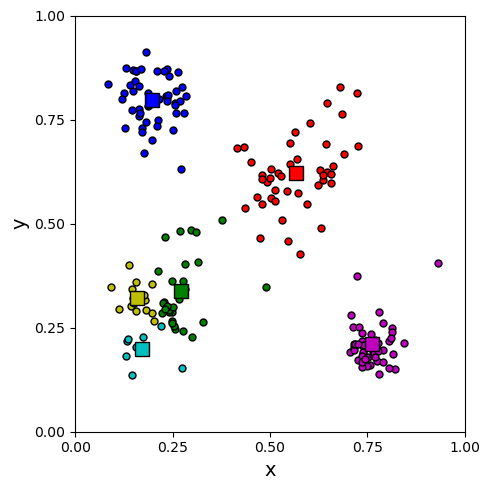

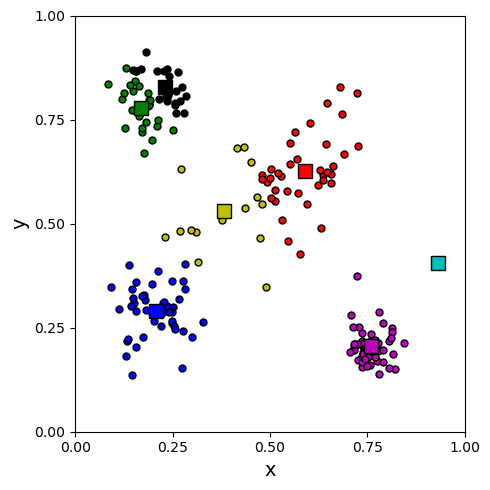

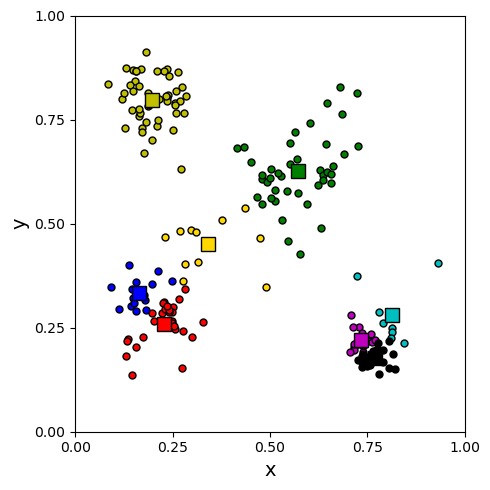

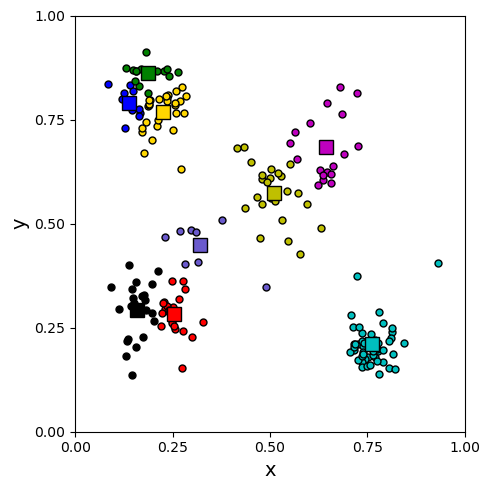

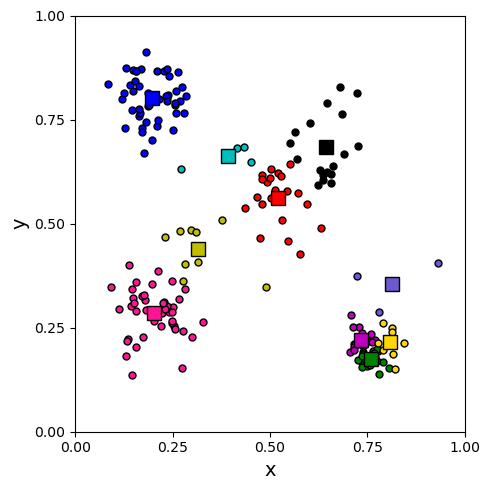

In [9]:
dataSetForIterationsTest = cm.getTestDataSet()
mForIterationsTest=2
for k in range(2, 11):
    centroidsForCurrentIteration = getCentroids(k, dataSetForIterationsTest)
    doKMeans(dataSetForIterationsTest, centroidsForCurrentIteration, mForIterationsTest, k)

## Part 2

The quality of final group assignment can be assessed in various ways. In this exercise, you are asked to compute a total (sum) distance between data points and their cluster centroids for different values of K. Obviously, it is expected that such indicator will always decrese with the increase of K. But, obviously, $K=\infty$ is not the best option. However, there exsits some threshold K' such that for each K'' > K' the decrease will not be significant. This threshold is called an "elbow" and its corresponding K value is considered satisfactory. Firstly, complete the below function. It should compute the total (sum) distance between data points and their cluster centroids. Secondly, compute the the total distances for final clusters for for $K\in [2, 10]$. Then, plot the results. Use cm.displayResults(plt, results), where results takes the follwoing form: [[2, result for K = 2], [3, result for K = 3], ..., [10, result for K = 10]]. Find the "elbow".

In [10]:
# Shows a correlation between total distance and number of clusters
# @param DATA - data set
# @param M - number of dimensions
# @param fromK - lower boundary of number of clusters (greater than or equal to 2)
# @param toK - upper boundary of number of clusters
def getTotalDistanceGraph(DATA, M, fromK, toK):
    table=[]
    if (fromK < 2): fromK = 2
    if (fromK > toK): fromK, toK = toK, fromK
    for k in range(fromK, toK):
        table.append([k,0,[]])
        CentroidsForElbowTest = getCentroids(k, DATA)
        DATA, newCentroidsForElbowTest, newAssignmentsForElbowTest = doKMeans(DATA, CentroidsForElbowTest,M, k, False)
        table[k-2][2]=[newCentroidsForElbowTest,newAssignmentsForElbowTest]
        table[k-2][1]=GetTotalDistanceOfDataSet(DATA,newCentroidsForElbowTest,newAssignmentsForElbowTest)
    cm.displayResults(plt,table)
    return table

# Returns total distance between points and centroids in given cluster
# @param DATA - data set
# @param CENTROIDS - set of precalculated centroids
# @param ASSIGNMENTS - data structure representing group assignments
# @return totalDistance
def GetTotalDistanceOfDataSet(DATA, CENTROIDS, ASSIGNMENTS):
    totalDistance=0
    for clusterMembers in ASSIGNMENTS:
        for clustermember in clusterMembers:
            totalDistance+=getEuclideanDistance(DATA[clustermember],CENTROIDS[ASSIGNMENTS.index(clusterMembers)])  
    return totalDistance

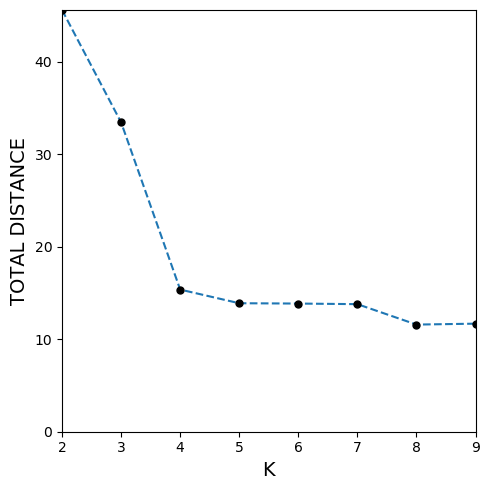

4


In [11]:
dataSetForElbowTest = cm.getTestDataSet()
table = getTotalDistanceGraph(dataSetForElbowTest,2,2,10)
for dataIndex in range(len(table)-1):
    # we assume that 10% change in Total distance between 
    # two consecutive numbers of clusters or less is "not significant"
    if (table[dataIndex + 1][1]) / table[dataIndex][1] > 0.90:
        print(table[dataIndex][0])
        break

# Part 3 - a small case study

In this exercise you are asked to use K-Means algorithm to cluster some data provided in cm.getCaseDataSet() (important note, this data was generated artificially - this is not real-world data). This data contains information on 250 persons. Each person is characterized with the following attributes:

a) Age <br>
b) Salary (zł) <br> 
c) Health index (0-100; 0 = worst health, 100 = best health) <br>
d) Time spent in school or work (hours) <br>
e) Time spent on sport activities (hours) <br>

Firstly, load the data. Secondly, check the min and max values for each attribute and consider normalization. Thirdly, run K-Means algorithm (use the pieces of code you completed in previous exercises) for different K. Fourthly, identify the best K using the performance indicator introduced in Part 2. Lastly - for the best K - analyze constructed clusters. Your can, e.g., generate distribution plots or simply compute mean attribute values within each cluster. For this reason, you can use centroids constructed in the final iteration. Characterize/describe the clusters.

In [12]:
# Normalizes data
# @param DATA - data set
# @return normalized Data set
def normalizeData(DATA):
    numberOfDimensionsCalculatedFromDataSet = len(DATA[0])
    MinMaxSets =[[float("-inf"),float("inf")] for m in range(numberOfDimensionsCalculatedFromDataSet)]
    for i in range(len(MinMaxSets)):
        buffer = [DATA[k][i] for k in range(len(DATA))]
        MinMaxSets[i][0] = min(buffer)
        MinMaxSets[i][1] = max(buffer)
    for i in range(len(DATA)):
        for j in range(len(DATA[i])):
            DATA[i][j]=(DATA[i][j]-MinMaxSets[j][0])/(MinMaxSets[j][1]-MinMaxSets[j][0])
    return DATA

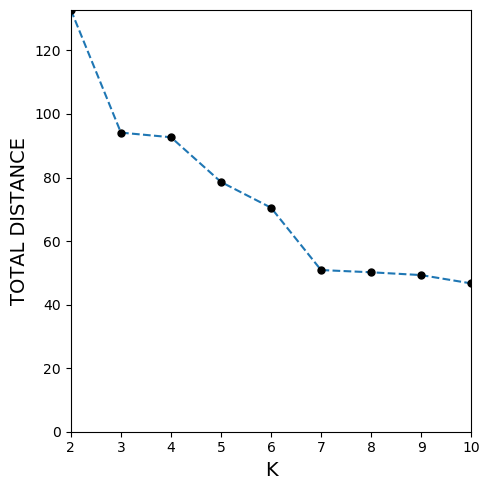

BEST K:  3
CENTROIDS: [[0.46704913608531085, 0.6510972957756496, 0.5719945671765352, 0.76288583421191, 0.41752497867776744], [0.8380341535686914, 0.25646863598162634, 0.13355388182853387, 0.05462629659566196, 0.10838395350268255], [0.10268866438647212, 0.12122142625621608, 0.47246324861787564, 0.47427129451138667, 0.30793208697027796]]


In [13]:
normalizedData = normalizeData(cm.getCaseDataSet())
kNormalizedSetTest = 5
mNormalizedSetTest = 5
kFromNormalizedSetTest = 2
kToNormalizedSetTest = 11
noReturnProtector = getTotalDistanceGraph(normalizedData,mNormalizedSetTest,kFromNormalizedSetTest,kToNormalizedSetTest)
bestKData = []
for dataIndex in range(len(noReturnProtector)-1):
    if (noReturnProtector[dataIndex + 1][1]) / noReturnProtector[dataIndex][1] > 0.90:
        bestKData = noReturnProtector[dataIndex]
        break
print("BEST K: ",bestKData[0])
print("CENTROIDS:",bestKData[2][0])